In [1]:
%matplotlib inline

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from PIL import Image

np.random.seed(0)

# Load the data

In [2]:
train = pd.read_csv("./data/train_augmented_reduced.csv")
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,...,wild boar,window screen,window shade,wing,wire-haired fox terrier,wok,wombat,wood rabbit,wooden spoon,zebra
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,...,1.370405e-07,9.120131e-08,9.620410e-08,9.886659e-09,1.516830e-06,2.543714e-07,6.532888e-09,2.143564e-08,2.199132e-08,1.804311e-08
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,...,7.019173e-06,4.317565e-03,9.602808e-03,1.617884e-04,7.745354e-05,1.854264e-06,3.699807e-06,1.004158e-03,2.429163e-03,1.647422e-03
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,...,1.531006e-08,1.205947e-07,1.660079e-09,1.358542e-09,6.075466e-09,1.431959e-09,4.368674e-08,1.527701e-08,4.852483e-10,8.205064e-10
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,...,8.449782e-08,7.258372e-06,9.183127e-06,5.377976e-07,4.001648e-02,8.849357e-07,1.589311e-06,8.007253e-06,2.567087e-06,1.721762e-06
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,...,1.501322e-07,5.324189e-06,2.671657e-07,1.052590e-07,1.369713e-07,4.257420e-09,1.959747e-06,9.865511e-07,8.348145e-09,7.608180e-07


In [3]:
features = train[train.columns.difference(["Pawpularity", "Id"])]
target = train.Pawpularity

In [4]:
reduced = features[features.columns.difference(features.columns[pd.DataFrame(features.max() < 0.9)[0]])]
features = reduced
features.shape

(9912, 217)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=44)

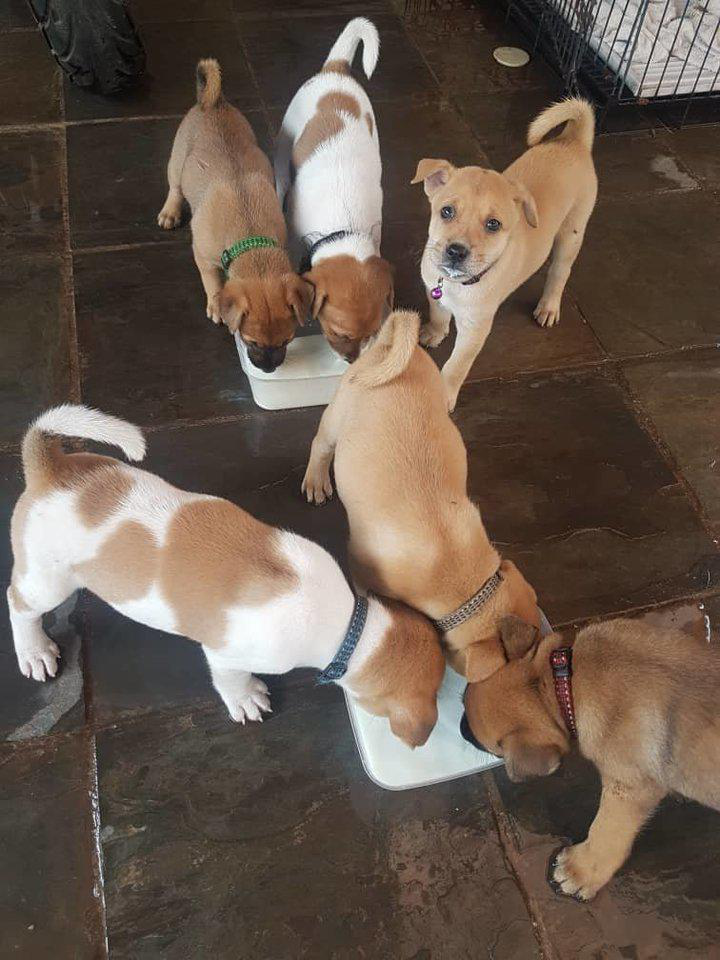

In [124]:
train.Id.iloc[features.muzzle.argmax()]

image = Image.open("data/train/"+train.Id.iloc[features.Pembroke.argmax()]+".jpg").show()

In [79]:
clf = RandomForestClassifier(max_depth=2, random_state=4)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("Random Forest:")
print(np.sqrt(mean_squared_error(predictions, y_test)))

Random Forest:
41.437739235874496


In [80]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
predictions = linearModel.predict(X_test)

print("Vanilla Linear Regression:")
print(np.sqrt(mean_squared_error(predictions, y_test)))

Vanilla Linear Regression:
20.402498048082958


In [81]:
gaussianModel = GaussianNB(var_smoothing = 1)
gaussianModel.fit(X_train, y_train)
predictions = gaussianModel.predict(X_test)

print("Vanilla Gaussian Naive Bayes w/ var_smooth = 1")
print(np.sqrt(mean_squared_error(predictions, y_test)))

Vanilla Gaussian Naive Bayes w/ var_smooth = 1
24.557978368817086


# Try indoor/outdoor!
[Here's an MIT paper](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjO37bppqXzAhVC6p4KHfpMD_4QFnoECAYQAQ&url=https%3A%2F%2Fhd.media.mit.edu%2Ftech-reports%2FTR-445.pdf&usg=AOvVaw3k11FSQYpC1Ov4GN3uPQz9)